In [15]:
class Solution:
    def romanToInt(self, s: str) -> int:
        mm = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000,'':0}
        if len(s)<2:
            return mm[s]
        ans = 0
        i=0
        while(i<len(s)):
            if i+1<len(s) and mm[s[i]]<mm[s[i+1]]:
                ans+=mm[s[i+1]]-mm[s[i]]
                i+=2
            else:
                ans+=mm[s[i]]
        return ans

test = Solution()
ans = test.romanToInt('IV')
print(ans)

4


In [13]:
for i in range(10):
    print(i)
    i+=1

0
1
2
3
4
5
6
7
8
9


Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)
Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 224, 224]) Training Device: cpu


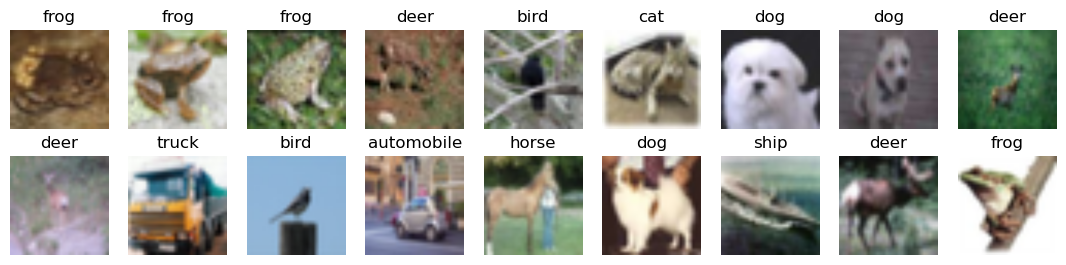

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
from tqdm import tqdm
from torch.nn import functional as F

myseed = 1314  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

trans = [transforms.ToTensor()]
trans.insert(0,transforms.Resize(224))
trans = transforms.Compose(trans)
print(trans)
train_data = torchvision.datasets.CIFAR10(
    root="./CIFAR10", train=True, transform=trans, download=True)
test_data  = torchvision.datasets.CIFAR10(
    root="./CIFAR10", train=False, transform=trans, download=True)
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 128  

train_dataloader = data.DataLoader(dataset = train_data,batch_size = BATCH_SIZE,shuffle = True)
test_dataloader  = data.DataLoader(dataset = test_data,batch_size = 50)

class_str = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck" ]

def get_class(indices):
    return class_str[int(indices)]

def draw_frame(img):
    pass

def show_img(img,label,nrow,ncol,scale=1.5):
    fig,axes = plt.subplots(nrow,ncol, figsize=(ncol*scale,nrow*scale)) 
    if nrow*ncol == 1:
        axes = [axes, ]
    else:
        axes = axes.flatten()
    for i,(img,ax) in enumerate(zip(img,axes)):
        ax.imshow(img.squeeze().permute(1,2,0))
        ax.set_title(get_class(label[i]))
        ax.axis('off')
    plt.show()

x, y = next(iter(train_dataloader))
print(x[0].shape,"Training Device:",device)
show_img(x,y,2,9)

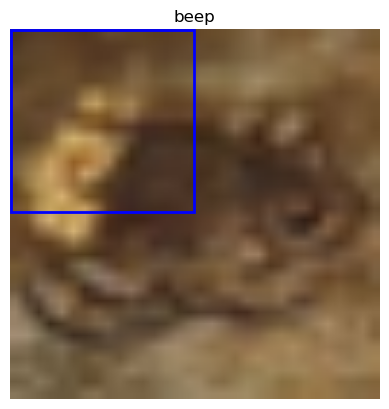

In [23]:
def corner_to_center(box):
    x1,y1,x2,y2 = box[:,0],box[:,1],box[:,2],box[:,3]
    cx = (x1 + x2)/2
    cy = (y1 + y2)/2
    w  = x2 - x1
    h  = y2 - y1
    ret = torch.stack((cx,cy,w,h),dim=-1)
    return ret

a = torch.tensor([0,0,111,110])


def bbox_to_rect(bbox, color):
    return plt.Rectangle(
    xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
    fill=False, edgecolor=color, linewidth=2)

fig,axes = plt.subplots(1,1)
axes.imshow(x[0].squeeze().permute(1,2,0))
axes.add_patch(bbox_to_rect(a, 'blue'))
axes.axis('off')
axes.set_title('beep')
plt.show()

In [53]:
x = [0,1,2,3,4]
y = [5,6,7,8]
x = torch.tensor(x)
y = torch.tensor(y)
x,y = torch.meshgrid(x,y,indexing='xy')
print(x)
print(y)
x = x.reshape(-1)
y = y.reshape(-1)
print(x)
print(y)

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
tensor([[5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8]])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8])


In [57]:
w,h = 5,10
offset_h,offset_w = 0,0
step_h,step_w = 1./h,1./w
center_x = (torch.arange(w)+offset_w)*step_w
center_y = (torch.arange(h)+offset_h)*step_h
shift_y, shift_x = torch.meshgrid(center_y, center_x)
shift_x,shift_y = shift_x.reshape(-1),shift_y.reshape(-1)

shift_x *= w
shift_y *= h

print(shift_y)
print(shift_x)


tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3.,
        3., 3., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 7.,
        7., 7., 7., 7., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9.])
tensor([0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2.,
        3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0.,
        1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4.])


In [ ]:
def box_iou(boxes1, boxes2):
    box_area = lambda boxes: ((boxes[:, 2] - boxes[:, 0]) *
    (boxes[:, 3] - boxes[:, 1]))
    # boxes1,boxes2,areas1,areas2的形状:
    # boxes1：(boxes1的数量,4),
    # boxes2：(boxes2的数量,4),
    # areas1：(boxes1的数量,),
    # areas2：(boxes2的数量,)
    areas1 = box_area(boxes1)
    areas2 = box_area(boxes2)
    # inter_upperlefts,inter_lowerrights,inters的形状:
    # (boxes1的数量,boxes2的数量,2)
    inter_upperlefts = torch.max(boxes1[:, None, :2], boxes2[:, :2])
    inter_lowerrights = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])
    inters = (inter_lowerrights - inter_upperlefts).clamp(min=0)
    # inter_areasandunion_areas的形状:(boxes1的数量,boxes2的数量)
    inter_areas = inters[:, :, 0] * inters[:, :, 1]
    union_areas = areas1[:, None] + areas2 - inter_areas
    return inter_areas / union_areas

b1 = torch.tensor([[0,0]])

In [71]:
a = torch.tensor([[1,2,2,2],[2,2,3,4]])
b = torch.tensor([[1,1,3,4]])
c = torch.max(a[:,:2],b[:,:2])
print(c)

tensor([[1, 2],
        [2, 2]])


In [77]:
a = torch.tensor([1,2])
b = torch.tensor([3,4])
c = (b-c).clamp(0,10)
print(c)

tensor([2, 3])


In [94]:
x = torch.randn((2,5))
print(x)
print(x.argmax())
print(x.max(dim=1))

tensor([[-0.5216, -2.3766, -0.2129, -0.3602,  0.7724],
        [-0.2612,  0.8958,  0.0693, -0.3331, -0.7799]])
tensor(6)
torch.return_types.max(
values=tensor([0.7724, 0.8958]),
indices=tensor([4, 1]))


In [134]:
import os
x = os.path.splitext('./CIFAR10/cifar-10-python.tar.gz')
print(x)

('./CIFAR10/cifar-10-python.tar', '.gz')


In [110]:
import os
x = [cla for cla in os.listdir('./') if os.path.isdir(os.path.join('./',cla))]
print(x)

['.git', '.vscode', 'CIFAR10', 'DATASETS', 'MNIST']


In [121]:
import json

print(json.dumps({"name": "John", "age": 30}))
print(json.dumps(["apple", "bananas"]))
print(json.dumps(("apple", "bananas")))
print(json.dumps("hello"))
print(json.dumps(42))
print(json.dumps(31.76))
print(json.dumps(True))
print(json.dumps(False))
print(json.dumps(None))

{"name": "John", "age": 30}
["apple", "bananas"]
["apple", "bananas"]
"hello"
42
31.76
true
false
null


In [132]:
x = []
y = {
  "name": "John",
  "age": 30,
  "city": "New York"
}
x.append(y)
x.append(y)
z = {
    'obj':x
}
print(z)
js = json.dumps(z,indent=4,sort_keys=True,separators=['?',"/"])
print(js)



{'obj': [{'name': 'John', 'age': 30, 'city': 'New York'}, {'name': 'John', 'age': 30, 'city': 'New York'}]}
{
    "obj"/[
        {
            "age"/30?
            "city"/"New York"?
            "name"/"John"
        }?
        {
            "age"/30?
            "city"/"New York"?
            "name"/"John"
        }
    ]
}


In [233]:
import random

i = os.cpu_count()
print(i)
x = list(range(10))
y = random.choices(x,k=4)
print(y)

6
[3, 7, 8, 6]


In [247]:
x = torch.tensor([[1,2,3,4,5.2],[1,23,41,4,131]])
y = torch.max(x,dim=1)
print(y)

torch.return_types.max(
values=tensor([  5.2000, 131.0000]),
indices=tensor([4, 4]))


In [16]:
import os
import torchvision
import torch

print(x)

range(0, 10)
